In [1]:
##### import standard python libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [2]:
import cooltools
import cooler

In [3]:
cool_file = "output/cooler/M_californicus/minPasses3_minRQ0.99/l2/M_californicus.p_ctg.hic_scaffolds_final.matrix_1-kb.mcool.old"

In [4]:
cooler.fileops.list_coolers(cool_file)

['/resolutions/1000',
 '/resolutions/2000',
 '/resolutions/4000',
 '/resolutions/8000',
 '/resolutions/16000',
 '/resolutions/32000',
 '/resolutions/64000',
 '/resolutions/128000',
 '/resolutions/256000',
 '/resolutions/512000',
 '/resolutions/1024000',
 '/resolutions/2048000',
 '/resolutions/4096000']

In [5]:
clr = cooler.Cooler(cool_file + '::resolutions/16000')

In [6]:
clr.binsize

16000

In [7]:
chromstarts = []
for i in clr.chromnames:
    print(f'{i} : {clr.extent(i)}')
    chromstarts.append(clr.extent(i)[0])

scaffold_1 : (0, 14591)
scaffold_2 : (14591, 28192)
scaffold_3 : (28192, 41779)
scaffold_4 : (41779, 49667)
scaffold_5 : (49667, 56829)
scaffold_6 : (56829, 63711)
scaffold_7 : (63711, 70032)
scaffold_8 : (70032, 75939)
scaffold_9 : (75939, 81825)
scaffold_10 : (81825, 87217)
scaffold_11 : (87217, 92578)
scaffold_12 : (92578, 97717)
scaffold_13 : (97717, 102111)
scaffold_14 : (102111, 106085)
scaffold_15 : (106085, 109800)
scaffold_16 : (109800, 113484)
scaffold_17 : (113484, 116956)
scaffold_18 : (116956, 120323)
scaffold_19 : (120323, 123134)
scaffold_20 : (123134, 125020)
scaffold_21 : (125020, 126138)
scaffold_22 : (126138, 126874)
scaffold_23 : (126874, 127315)
scaffold_24 : (127315, 127740)
scaffold_25 : (127740, 127887)
scaffold_26 : (127887, 128029)
scaffold_27 : (128029, 128156)
scaffold_28 : (128156, 128279)
scaffold_29 : (128279, 128399)
scaffold_30 : (128399, 128518)
scaffold_31 : (128518, 128589)
scaffold_32 : (128589, 128657)
scaffold_33 : (128657, 128716)
scaffold_34 : (

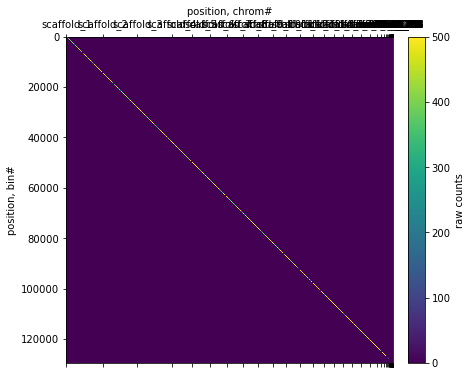

In [9]:
f, ax = plt.subplots(
    figsize=(7,6))
im = ax.matshow((clr.matrix(balance=False)[:]),vmax=500);
plt.colorbar(im ,fraction=0.046, pad=0.04, label='raw counts')
ax.set(xticks=chromstarts, xticklabels=clr.chromnames,
       xlabel='position, chrom#', ylabel='position, bin#')
ax.xaxis.set_label_position('top')

In [15]:
clr_balanced =cooler.balance_cooler(clr)

/global/scratch2/mvazquez/projects/BatGenomeAssembly/.snakemake/conda/4f33ca78/lib/python3.6/site-packages/cooler/balance.py:111: ConvergenceWarning: Iteration limit reached without convergence.
  "Iteration limit reached without convergence.", ConvergenceWarning


ValueError: No column 'bins/weight'found. Use ``cooler.balance_cooler`` to calculate balancing weights or set balance=False.

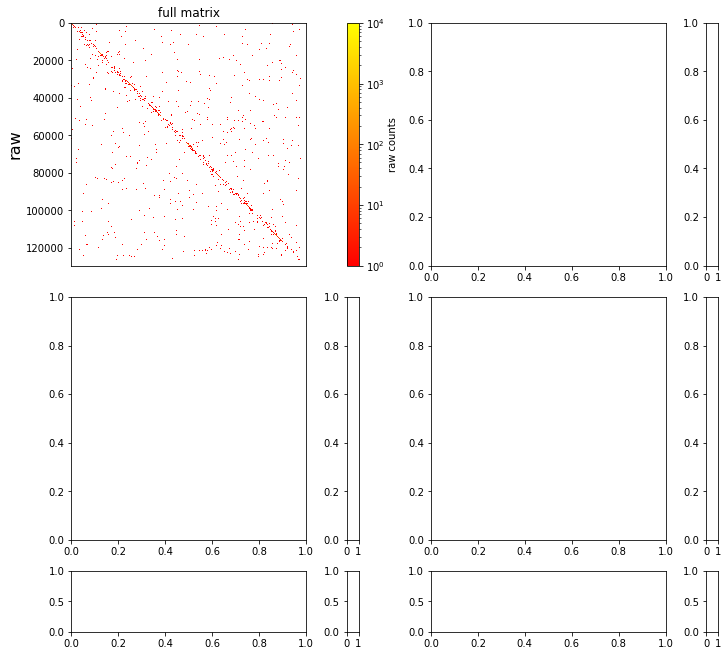

In [13]:
### plot the raw and corrected data in logscale ###
from mpl_toolkits.axes_grid import make_axes_locatable
from matplotlib.colors import LogNorm

plt_width=4
f, axs = plt.subplots(
    figsize=( plt_width+plt_width+2, plt_width+plt_width+1),
    ncols=4,
    nrows=3,
    gridspec_kw={'height_ratios':[4,4,1],"wspace":0.01,'width_ratios':[1,.05,1,.05]},
    constrained_layout=True
)

norm = LogNorm(vmax=0.1)
norm_raw = LogNorm(vmin=1, vmax=10_000)

ax = axs[0,0]
im = ax.matshow(
    clr.matrix(balance=False)[:],
    norm=norm_raw,
    cmap='autumn',
    aspect='auto'
);
ax.xaxis.set_visible(False)
ax.set_title('full matrix')
ax.set_ylabel('raw', fontsize=16)

cax = axs[0,1]
plt.colorbar(im, cax=cax, label='raw counts')

ax = axs[1,0]
im = ax.matshow(
    clr.matrix()[:],
    norm=norm,
    cmap='autumn',
);
ax.xaxis.set_visible(False)
ax.set_ylabel('balanced', fontsize=16)

cax = axs[1,1]
plt.colorbar(im, cax=cax, label='corrected freqs')

ax1 = axs[2,0]
weights = clr.bins()[:]['weight'].values
ax1.plot(weights)
ax1.set_xlim([0, len(clr.bins()[:])])
ax1.set_xlabel('position, bins')

ax1 = axs[2,1]
ax1.set_visible(False)



start = 30_000_000
end = 32_000_000
region = ('scaffold_1', start, end)

ax = axs[0,2]
im = ax.matshow(
        clr_10kb.matrix(balance=False).fetch(region),
    norm=norm_raw,
    cmap='autumn'
);
ax.set_title(f'chr17:{start:,}-{end:,}')
ax.xaxis.set_visible(False)

cax = axs[0,3]
plt.colorbar(im, cax=cax, label='raw counts');

ax = axs[1,2]
im = ax.matshow(
    clr_10kb.matrix().fetch(region),
    norm=norm,
    cmap='autumn',
    extent=(start, end, end, start)
);
ax.xaxis.set_visible(False)

cax = axs[1,3]
plt.colorbar(im, cax=cax, label='corrected frequencies');

ax1 = axs[2,2]
weights = clr_10kb.bins().fetch(region)['weight'].values
ax1.plot(
    np.linspace(start, end, len(weights)),
    weights
)
format_ticks(ax1, y=False, rotate=False)
ax1.set_xlim(start, end);
ax1.set_xlabel('scaffold_1 position, bp')

ax1 = axs[2,3]
ax1.set_visible(False)

In [ ]:
clr.bins()[:3]

In [ ]:
from cooltools.lib.numutils import adaptive_coarsegrain, interp_nan

clr_10kb = cooler.Cooler(cool_file + '::resolutions/16000')
start = 0
end = 35_000_000
region = ('scaffold_1', start, end)
extents = (start, end, end, start)
clr_balanced = cooler.balance_cooler(clr)

In [ ]:
cg = adaptive_coarsegrain(clr_10kb.matrix(balance=True).fetch(region),
                              clr_10kb.matrix(balance=False).fetch(region),
                              cutoff=3, max_levels=8)

cgi = interp_nan(cg)

f, axs = plt.subplots(
    figsize=(18,5),
    nrows=1,
    ncols=3,
    sharex=True, sharey=True)

ax = axs[0]
im = ax.matshow(clr_10kb.matrix(balance=True).fetch(region), cmap='autumn', norm=norm, extent=extents)
ax.set_title('corrected')

ax = axs[1]
im2 = ax.matshow(cg, cmap='autumn', norm=norm, extent=extents)
ax.set_title(f'adaptively coarsegrained')

ax = axs[2]
im3 = ax.matshow(cgi, cmap='autumn', norm=norm, extent=extents)
ax.set_title(f'interpolated')

for ax in axs:
    format_ticks(ax, rotate=False)

plt.colorbar(im3, ax=axs, fraction=0.046, label='corrected frequencies')
